# Análisis exploratorio para imdb_movies
## Análisis sugeridos:
1. Distribución de calificaciones IMDB
2. Comparación de recaudación por género
3. Evolución del rating por año


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px


In [ ]:

movies = pd.read_csv('../dataset/imdb_movies.csv')
movies.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [2]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


## Analisis exploratorio (ejemplos)

In [11]:
#Película por año
(
    movies
        .groupby('Released_Year',as_index=False)
        ['Series_Title']
        .count()
        .sort_values(by=['Series_Title'],ascending=[False])
        
)

,Released_Year,Series_Title
92,2014,32
82,2004,31
87,2009,29
94,2016,28
91,2013,28
...,...,...
14,1936,1
8,1930,1
1,1921,1
2,1922,1


In [ ]:
movies['Gross']=pd.to_numeric(movies['Gross'].str.replace(',',''),errors='coerce')


In [ ]:
movies['Genre']=movies['Genre'].str.split(',')


0                           [Drama]
1                   [Crime,  Drama]
2          [Action,  Crime,  Drama]
3                   [Crime,  Drama]
4                   [Crime,  Drama]
                   ...             
995      [Comedy,  Drama,  Romance]
996               [Drama,  Western]
997         [Drama,  Romance,  War]
998                   [Drama,  War]
999    [Crime,  Mystery,  Thriller]
Name: Genre, Length: 1000, dtype: object

<Axes: title={'center': 'Cuartiles de Gross'}>

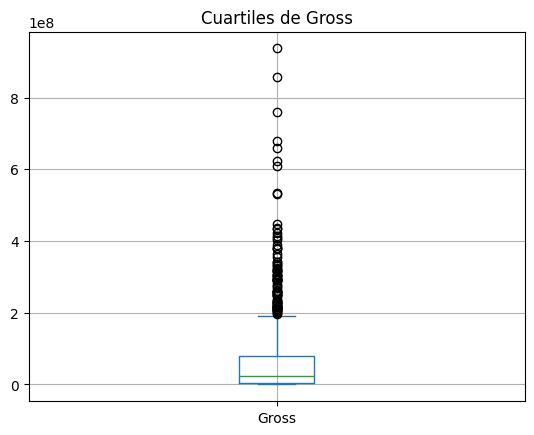

In [16]:


movies['Gross'].plot(kind='box', title='Cuartiles de Gross', grid=True)


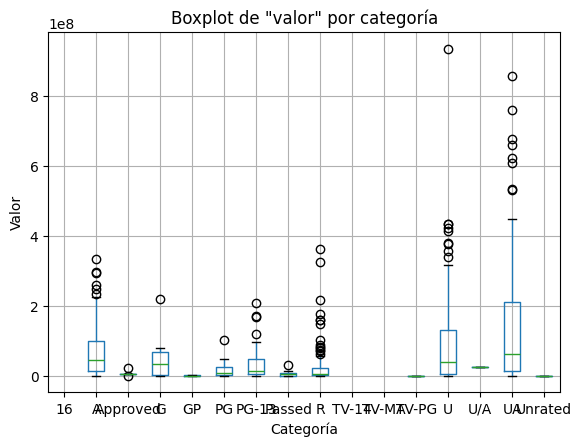

In [22]:

movies.boxplot(column='Gross', by='Certificate')
plt.title('Boxplot de "valor" por categoría')
plt.suptitle('')  # Quita el título automático "Boxplot grouped by categoria"
plt.xlabel('Categoría')
plt.ylabel('Valor')
plt.show()

In [23]:
fig = px.box(movies, x='Certificate', y='Gross', title='Boxplot de "Gross" por categoría (Certificate)')
fig.update_layout(
    xaxis_title='Categoría',
    yaxis_title='Valor',
    boxmode='group'  # Por si tienes múltiples trazas en el futuro
)
fig.show()
